<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Introducción" data-toc-modified-id="Introducción-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Introducción</a></span></li><li><span><a href="#Métricas-en-la-regresión-logística." data-toc-modified-id="Métricas-en-la-regresión-logística.-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Métricas en la regresión logística.</a></span><ul class="toc-item"><li><span><a href="#Matriz-de-confusión." data-toc-modified-id="Matriz-de-confusión.-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Matriz de confusión.</a></span></li></ul></li><li><span><a href="#Ajuste-del-modelo-variables-estandarizadas-y-codificadas" data-toc-modified-id="Ajuste-del-modelo-variables-estandarizadas-y-codificadas-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Ajuste del modelo variables estandarizadas y codificadas</a></span><ul class="toc-item"><li><span><a href="#Métricas" data-toc-modified-id="Métricas-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Métricas</a></span><ul class="toc-item"><li><span><a href="#Matriz-de-confusión" data-toc-modified-id="Matriz-de-confusión-3.1.1"><span class="toc-item-num">3.1.1&nbsp;&nbsp;</span>Matriz de confusión</a></span></li></ul></li></ul></li><li><span><a href="#Ajuste-del-modelo-variables-codificadas" data-toc-modified-id="Ajuste-del-modelo-variables-codificadas-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Ajuste del modelo variables codificadas</a></span><ul class="toc-item"><li><span><a href="#Métricas" data-toc-modified-id="Métricas-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Métricas</a></span><ul class="toc-item"><li><span><a href="#Matriz-de-confusión" data-toc-modified-id="Matriz-de-confusión-4.1.1"><span class="toc-item-num">4.1.1&nbsp;&nbsp;</span>Matriz de confusión</a></span></li></ul></li></ul></li><li><span><a href="#Comparación-de-los-modelos" data-toc-modified-id="Comparación-de-los-modelos-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Comparación de los modelos</a></span></li></ul></div>

In [32]:

# Tratamiento de datos
# -----------------------------------------------------------------------
import numpy as np
import pandas as pd

# Gráficos
# ------------------------------------------------------------------------------
import matplotlib.pyplot as plt
import seaborn as sns


#  Modelado y métricas
# ------------------------------------------------------------------------------
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score , cohen_kappa_score, roc_curve,roc_auc_score


#  Gestión de warnings
# ------------------------------------------------------------------------------
import warnings
warnings.filterwarnings("ignore")

# Introducción

En esta lección aprenderemos cuáles son las principales métricas para evaluar cómo de bueno es nuestro modelo prediciendo. Recordemos que, en la lección aprendimos que era la matriz de confusión y que muchas de las métricas que veremos hoy se basan en esta matriz. 


Recordemos, igual que en la leccion anterior, en este jupyter solo usaremos dos set de datos:  

- El de las variables codificadas y estandarizadas

- El de las variables codificadas y sin estandarizar. 

Peeero .... 👇🏽👇🏽

📌 **NOTA**  El ejercicio de la clase invertida, será calcular las métricas de los modelos con esos conjuntos de datos (los datos con la corrección del desbalanceo). Esta dinámica la seguiremos a lo largo de las siguientes lecciones, de tal forma que iremos comparando cada modelo en función de su preprocesamiento.  

# Métricas en la regresión logística.

Como ya anticipamos, las métricas que se han utilizado para las regresiones lineales no son aplicables para el caso de la regresión logística, por lo tanto deberemos introducir una serie de conceptos nuevos para ser capaces de evaluar los resultados obtenidos.

Vamos a ello!

## Matriz de confusión. 

Ayer ya aprendimos que es la matriz de confusión, veamos otra vez la imagen para recordar que era: 


![image.png](https://github.com/Adalab/data_imagenes/blob/main/Modulo-3/regresion_lineal/matriz_conf.png?raw=true)

Donde: 

- **Verdadero positivo (VP)**: El valor se ha predicho como posititivo y en la realidad es positivo.

- **Falso Positivo (FP)**: El valor ha sido predicho como positivo, cuando era negativo. Se ha predicho de forma incorrecta. ( Tambien llamado error de tipo I).

- **Falso negativo (FN)**: El valor ha sido predicho como negativo, cuando era positivo. Se ha predicho de forma incorrecta. ( Tambien llamado error de tipo II).

- **Verdadero Negativo (VN)**: El valor se ha predicho como negativo y en la realidad era negativo. 


--------


A raiz de la matriz de confusión podemos definir las siguientes métricas de la precisión de nuestras predicciones:

- ***Accuracy***: también llamada **exactitud**. Mide  que porcentaje de los valores predichos están bien predichos. Viene definida por la siguiente fórmula: 

$$ accuracy =\dfrac{VP + VN}{VP + FP + FN + VN} $$

- ***Recall***: también llamado **sensibilidad** o **exhaustividad**. Contesta a la siguiente pregunta: **¿Qué porcentaje de casos positivos fueron capturados?**. Viene definida por la siguiente fórmula

$$ recall =\dfrac{VP}{VP + FN} $$


- ***Precision***: contesta a la siguiente pregunta **¿Qué porcentaje de predicciones positivas fueron correctas?**

$$  precision  =\dfrac{VP}{VN + FP} $$



- ***Especificidad*** : es el opuesto a la exhaustividad o recall, es decir, contesta a la pregunta de **¿Qué porcentaje de casos negativos fueron capturados?**. Viene definida por la siguiente fórmula: 


$$ Especificidad\:  =\dfrac{VN}{VN + FP}$$



- ***F1***: es la media de la *precision* y el *recall*, teniendo en cuenta ambas métricas en la siguiente ecuación:

$$ F1 = \dfrac{2 (Precision \cdot Exhaustividad)}{Precision +Exhaustividad}$$


- ***kappa***: es una medida de concordancia que se basa en comparar la concordancia observada en un conjunto de datos, respecto a la que podría ocurrir por mero azar.

    - <0 No acuerdo

    - 0.0-0.2 Insignificante

    - 0.2-0.4 Bajo

    - 0.4-0.6 Moderado

    - 0.6-0.8 Bueno

    - 0.8-1.0 Muy bueno




De forma gráfica esto se puede ver con la llamada como **curva ROC** ( *Receiver Operating Characteristic*)  donde se representan la sensibilidad ( o ratio de verdareros positivos) frente a 1 -especificidad  (o ratio de falsos positivos). Es decir, nos esta diciendo como de bien es capaz de distinguir nuestro modelos entre ser positivo (VP) o no(VN). Un buen modelo será capaz de distinguir entre los dos, mientras que un modelo malo no será capaz. 

![image.png](https://github.com/Adalab/data_imagenes/blob/main/Modulo-3/regresion_lineal/ROC.png?raw=true)

Por otro lado a raiz de la gráfica podemos ver la curva que describe nuestro modelo de regresión a la hora de clasificar los resultados. A efectos prácticos se define tambien la métrica **AUC** (*Area Under Curve* o el Área bajo la Curva en castellano). Cuanto más cerca esté de 1 este valor, mejor será nuestro modelo clasificando los VP y lo VP. Si es el valor del AUC  es de 0.5 implicaría que nuestro modelo arroja las predicciones de forma aleatoria y que ambas clases son igual de posibles. 

> Tanto la curva ROC y el AUC se utilizan en tandem ya que nos permite ver de forma gráfica como de buena es nuestra curva al mismo tiempo.


Después de toda esta teória calculemos las métricas de nuestro modelo para poder entenderlas mejor. 

# Ajuste del modelo variables estandarizadas y codificadas

Esta parte es igual a la clase anterior

In [33]:
df_esta = pd.read_csv("../files/titanic_esta_enco.csv", index_col = 0)
df_esta.head()


,survived,pclass,sex,age,fare,num_familiar,embarked_C,embarked_Q,embarked_S,maturity_adult,maturity_child,adult_male_False,adult_male_True,alone_False,alone_True
0,0,3,0,-0.525629,-0.850402,0.757803,0,0,1,1,0,0,1,1,0
1,1,1,1,0.809187,3.775012,0.757803,1,0,0,1,0,1,0,1,0
2,1,3,1,-0.191925,-0.801644,-0.643861,0,0,1,1,0,1,0,0,1
3,1,1,1,0.558909,2.461550,0.757803,0,0,1,1,0,1,0,1,0
4,0,3,0,0.558909,-0.792614,-0.643861,0,0,1,1,0,0,1,0,1


In [34]:
# separamos los datos en X e y

X1 = df_esta.drop("survived", axis = 1)
y1 = df_esta["survived"]

In [35]:
# comprobamos que tenemos en X, deberíamos tener todas nuestras variables predictoras

X1.head()

,pclass,sex,age,fare,num_familiar,embarked_C,embarked_Q,embarked_S,maturity_adult,maturity_child,adult_male_False,adult_male_True,alone_False,alone_True
0,3,0,-0.525629,-0.850402,0.757803,0,0,1,1,0,0,1,1,0
1,1,1,0.809187,3.775012,0.757803,1,0,0,1,0,1,0,1,0
2,3,1,-0.191925,-0.801644,-0.643861,0,0,1,1,0,1,0,0,1
3,1,1,0.558909,2.461550,0.757803,0,0,1,1,0,1,0,1,0
4,3,0,0.558909,-0.792614,-0.643861,0,0,1,1,0,0,1,0,1


In [36]:
# comprobamos que tenemos en la y, deberíamos tener la variable respuesta

y1.head()

0    0
1    1
2    1
3    1
4    0
Name: survived, dtype: int64

In [37]:
# separamos en train y test
x_train1, x_test1, y_train1, y_test1 = train_test_split(X1, y1, test_size = 0.2, random_state = 42)

In [38]:
# ajuste y prediccion del modelo

# definimos la regresión logistica

log_reg_esta = LogisticRegression(n_jobs=-1, max_iter = 1000)

# ajustamos el modelo
log_reg_esta.fit(x_train1,y_train1)

# obtenemos las predicciones para el conjunto de entrenamiento
y_pred_train_esta = log_reg_esta.predict(x_train1)

# obtenemos las predicciones para el conjunto de test
y_pred_test_esta = log_reg_esta.predict(x_test1)

## Métricas

### Matriz de confusión

Recordemos que se trata de una herramienta que nos permite analizar los resultados de como de bueno es nuestro modelo a la hora de hacer las predicciones. Esta matriz viene representada por una tabla, donde en las filas tendremos los valores reales y en las columnas los valores predichos.  

Es decir, esta matriz relaciona las predicciones realizadas por nuestro modelo y los valores reales de nuestros datos. 

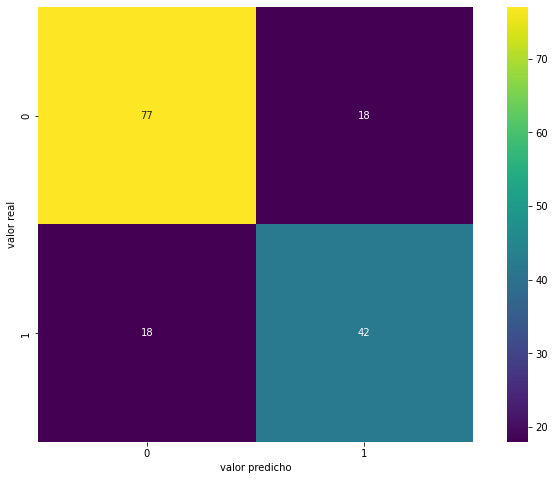

In [39]:
mat_lr_esta = confusion_matrix(y_test1, y_pred_test_esta)

plt.figure(figsize = (12, 8))
sns.heatmap(mat_lr_esta, square=True, annot=True, fmt="d", cmap = "viridis")

plt.xlabel('valor predicho')
plt.ylabel('valor real')
plt.show()

In [40]:
# vamos a hacernos una función para sacar las métricas igual que hicimos con al regresión lineal.


def metricas(clases_reales_test, clases_predichas_test, clases_reales_train, clases_predichas_train, modelo):
    
    # para el test
    accuracy_test = accuracy_score(clases_reales_test, clases_predichas_test)
    precision_test = precision_score(clases_reales_test, clases_predichas_test)
    recall_test = recall_score(clases_reales_test, clases_predichas_test)
    f1_test = f1_score(clases_reales_test, clases_predichas_test)
    kappa_test = cohen_kappa_score(clases_reales_test, clases_predichas_test)

    # para el train
    accuracy_train = accuracy_score(clases_reales_train, clases_predichas_train)
    precision_train = precision_score(clases_reales_train, clases_predichas_train)
    recall_train = recall_score(clases_reales_train, clases_predichas_train)
    f1_train = f1_score(clases_reales_train, clases_predichas_train)
    kappa_train = cohen_kappa_score(clases_reales_train, clases_predichas_train)
    

    
    df = pd.DataFrame({"accuracy": [accuracy_test, accuracy_train], 
                       "precision": [precision_test, precision_train],
                       "recall": [recall_test, recall_train], 
                       "f1": [f1_test, f1_train],
                       "kapppa": [kappa_test, kappa_train],
                       "set": ["test", "train"]})
    
    df["modelo"] = modelo
    return df

In [41]:
results_logistic_esta = metricas(y_test1, y_pred_test_esta, y_train1, y_pred_train_esta, "Regresión logistica Esta")
results_logistic_esta

,accuracy,precision,recall,f1,kapppa,set,modelo
0,0.767742,0.700000,0.700000,0.700000,0.510526,test,Regresión logistica Esta
1,0.801613,0.781893,0.730769,0.755467,0.588895,train,Regresión logistica Esta


**Interpretemos ahora los resultados** 


Si miramos los datos del test: 

- *Accuracy*: nuestro modelo acierta el 76% de la veces. 

- *Precision*:  tenemos un valor de 0.7, ¿esto que significa? que nuestro modelo se equivocará un 30% de las veces que prediga que un pasajero va a morir.

- *Recall*: tenemos un valor de 0.7. Es decir, nuestro modelo es capaz de identificar un 70% de los pasajeros que fallecieron.

- *kappa* tenemos un valor de 0.51. Esto en realidad nos esta diciendo que la concordancia de nuestros datos es moderada, es decir, que nuestro modelo esta acertando en sus predicciones un poco por azar. 


Con esto podemos ver que aunque en realidad nuestras métricas no parecen malas, en realidad son un poco el resultado del azar, por lo tanto, no son tan buenas como creíamos. 


Parece que nuestro modelo no es el mejor de todos, pero recordemos que teníamos otro tipo de algoritmos, como el *DecisionTree* o el *RandomForest* que aprendimos con los modelos de regresión lineal. En las próximas lecciones aprenderemos como usar este tipo de algoritmos en modelos de regresión logística. 






# Ajuste del modelo variables codificadas

Esta parte es igual a la clase anterior

In [42]:
df = pd.read_csv("../files/titanic_enco.csv", index_col = 0)
df.head()


,survived,pclass,sex,age,fare,num_familiar,embarked_C,embarked_Q,embarked_S,maturity_adult,maturity_child,adult_male_False,adult_male_True,alone_False,alone_True
0,0,3,0,22.0,7.2500,1,0,0,1,1,0,0,1,1,0
1,1,1,1,38.0,71.2833,1,1,0,0,1,0,1,0,1,0
2,1,3,1,26.0,7.9250,0,0,0,1,1,0,1,0,0,1
3,1,1,1,35.0,53.1000,1,0,0,1,1,0,1,0,1,0
4,0,3,0,35.0,8.0500,0,0,0,1,1,0,0,1,0,1


In [43]:
# separamos los datos en X e y

X2 = df.drop("survived", axis = 1)
y2 = df["survived"]

In [44]:
# comprobamos que tenemos en X, deberíamos tener todas nuestras variables predictoras

X2.head()

,pclass,sex,age,fare,num_familiar,embarked_C,embarked_Q,embarked_S,maturity_adult,maturity_child,adult_male_False,adult_male_True,alone_False,alone_True
0,3,0,22.0,7.2500,1,0,0,1,1,0,0,1,1,0
1,1,1,38.0,71.2833,1,1,0,0,1,0,1,0,1,0
2,3,1,26.0,7.9250,0,0,0,1,1,0,1,0,0,1
3,1,1,35.0,53.1000,1,0,0,1,1,0,1,0,1,0
4,3,0,35.0,8.0500,0,0,0,1,1,0,0,1,0,1


In [45]:
# comprobamos que tenemos en la y, deberíamos tener la variable respuesta

y2.head()

0    0
1    1
2    1
3    1
4    0
Name: survived, dtype: int64

In [46]:
# separamos en train y test
x_train2, x_test2, y_train2, y_test2 = train_test_split(X2, y2, test_size = 0.2, random_state = 42)

In [47]:
# ajuste y prediccion del modelo

# definimos la regresión logistica

log_reg = LogisticRegression(n_jobs=-1, max_iter = 1000)

# ajustamos el modelo
log_reg.fit(x_train2,y_train2)

# obtenemos las predicciones para el conjunto de entrenamiento
y_pred_train = log_reg.predict(x_train2)

# obtenemos las predicciones para el conjunto de test
y_pred_test = log_reg_esta.predict(x_test2)

## Métricas

### Matriz de confusión

Recordemos que se trata de una herramienta que nos permite analizar los resultados de como de bueno es nuestro modelo a la hora de hacer las predicciones. Esta matriz viene representada por una tabla, donde en las filas tendremos los valores reales y en las columnas los valores predichos.  

Es decir, esta matriz relaciona las predicciones realizadas por nuestro modelo y los valores reales de nuestros datos. 

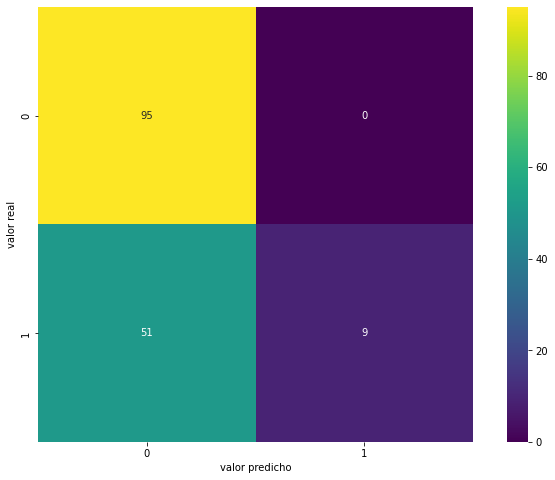

In [48]:
mat_lr = confusion_matrix(y_test2, y_pred_test)

plt.figure(figsize = (12, 8))
sns.heatmap(mat_lr, square=True, annot=True, fmt="d", cmap = "viridis")

plt.xlabel('valor predicho')
plt.ylabel('valor real')
plt.show()

In [49]:
results_logistic = metricas(y_test2, y_pred_test, y_train2, y_pred_train, "Regresión logistica")
results_logistic

,accuracy,precision,recall,f1,kapppa,set,modelo
0,0.670968,1.000000,0.150000,0.260870,0.177847,test,Regresión logistica
1,0.801613,0.781893,0.730769,0.755467,0.588895,train,Regresión logistica


**Interpretemos ahora los resultados** 


Si miramos los datos del test: 

- *Accuracy*: nuestro modelo acierta el 67% de la veces. 

- *Precision*:  tenemos un valor de 1, ¿esto que significa?  que  nuestro modelo se equivocará un 0% de las veces que prediga que un pasajero va a morir.

- *Recall*: tenemos un valor de 0.15. Es decir, nuestro modelo es capaz de identificar un 15% de los pasajeros que fallecieron.

- *kappa* tenemos un valor de 0.17. Esto en realidad nos esta diciendo que la concordancia de nuestros datos es baja, es decir, que nuestro modelo esta acertando en sus predicciones por puro azar. 


**¿Os acordáis del *overfitting*  y del *underfitting*?** Recordemos: 


- Si los valores del *train* son MUCHO MEJOR (que es tener métricas más altas) que los del *test* --> ***overfitting***. En este caso, nuestro modelo se estaría aprendiendo de memoria los datos de entrenamiento y no sería capaz de hacer buenas predicciones fuera de ese set de datos.


- Si los valores del *train* son MUCHO PEOR (valores de las métricas más bajas) que los del *test* --> ***underfitting***. En este caso, nuestro modelo no es lo suficientemente bueno para generalizar a los datos de test ni para modelar decentemente los del *train*.

**Qué está pasando en nuestro modelo?**

Tenemos un *overfitting* enorme, por lo tanto, nuestro modelo no sería valido. 

# Comparación de los modelos

Juntemos los dos *dataframes* de las métricas que hemos creado

In [50]:
resultados_todo = pd.concat([results_logistic, results_logistic_esta], axis = 0)
resultados_todo

,accuracy,precision,recall,f1,kapppa,set,modelo
0,0.670968,1.000000,0.150000,0.260870,0.177847,test,Regresión logistica
1,0.801613,0.781893,0.730769,0.755467,0.588895,train,Regresión logistica
0,0.767742,0.700000,0.700000,0.700000,0.510526,test,Regresión logistica Esta
1,0.801613,0.781893,0.730769,0.755467,0.588895,train,Regresión logistica Esta


In [51]:
# guardemos este dataframe con los resultados en un csv para compararlo con otros modelos como hicimos en regresión lineal

resultados_todo.to_csv("../files/resultados_titanic_logistica.csv")


Parece que nuestros modelos no son los mejores de todos, pero recordemos que teníamos otro tipo de algoritmos, como el *DecisionTree* o el *RandomForest* que aprendimos con los modelos de regresión lineal. En las próximas lecciones aprenderemos como usar este tipo de algoritmos en modelos de regresión logística. 